In [2]:
import numpy as np
import sklearn as sk
from sklearn import datasets
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import pandas as pd
import sys

iris = datasets.load_iris()

## On commence par regarder les données en faisant des resprésentations 2d


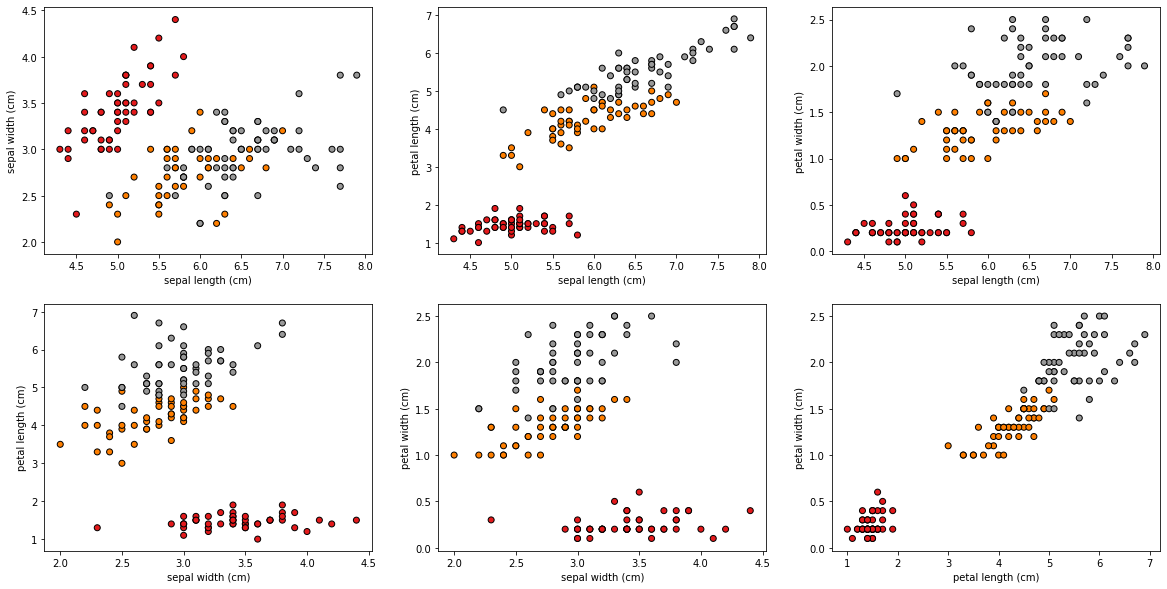

In [3]:
X = iris.data
nb_fig = 1
plt.figure(2, figsize=(20, 10))
plt.clf()
for i in range(0, X.shape[1]):
    for j in range(i+1, X.shape[1]):
        plt.subplot(2,3, nb_fig)
        plt.scatter(X[:, i], X[:, j], c=iris.target, cmap=plt.cm.Set1,
                edgecolor='k')
    
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        nb_fig = nb_fig + 1

# code de la fonction K-means


In [4]:
# Fonction pour initialiser les centres dans l'algorithme k-means, qui renvoie un numpy arrray de dimension (K,4)

def init(K):
    column0 = 4.0*np.random.rand(K,1)+4.0
    column1 = 2.5*np.random.rand(K,1)+2.0
    column2 = 6.0*np.random.rand(K,1)+1.0
    column3 = 2.5*np.random.rand(K,1)
    return np.concatenate((column0, column1, column2, column3), axis = 1)

In [5]:
# Fonction calculant la distance entre 2 points de meme dimension
from math import sqrt
def distance(x1, x2):
    dist = 0
    for i in range(len(x1)):
        dist += (x1[i]-x2[i])**2
    return sqrt(dist)

In [6]:
# Fonction permettant de trouver le centre le plus proche d'un point x quelconque, elle renvoie l'indice du centre dans le numpy array centers

def min_dist(x, centers):
    mini = distance(x, centers[0])
    mini_index = 0
    for i in range(1,len(centers)):
        if mini>distance(x, centers[i]):
            mini = distance(x, centers[i])
            mini_index = i
    return mini_index

In [7]:
# Fonction qui fait le partitionnement des donnees a chaque centre le plus proche
# elle renvoie la liste clusters de la taille du nombre de donnes contenant les indices des centres les plus proches, correspondant aux clusters
# et la taille de chaque clusters dans une liste clusters_size

def partitionning(data, centers):
    clusters = []
    clusters_size = np.zeros(len(centers))
    for i in range(len(data)):
        j=min_dist(data[i], centers)
        clusters.append(j)
        clusters_size[j]+=1
    return clusters, clusters_size

In [8]:
# Fonction qui met a jour les centres en les remplacant par les barycentres de chaque cluster

def update_centers(data, centers, clusters, clusters_size):
    for i in range(len(centers)):
        if clusters_size[i]!=0:
            new_center = np.zeros(len(data[0]))
            for j in range(len(clusters)):
                if clusters[j]==i:
                    new_center += data[j]
            new_center *= 1.0/clusters_size[i]
            centers[i] = new_center

In [9]:
# Fonction qui retourne True si chaque element x1[i][j] du numpy array x1 est egal a chaque element x2[i][j] du numpy array x2
# Utile pour savoir quand s'arreter dans l'algorithme k-means

def equal(x1,x2):
    for i in range(len(x1)):
        for j in range(len(x1[i])):
            if x1[i][j]!=x2[i][j]:
                return False
    return True

In [10]:
# Fonction k-means reutilisant les precedentes fonctions, renvoyant les centres, les clusters et les tailles des clusters

def K_means(data, K):
    centers = init(K)
    clusters, clusters_size = partitionning(data, centers)
    centers_update = centers
    update_centers(data, centers_update, clusters, clusters_size)
    while equal(centers_update,centers)==False:
        centers = centers_update
        clusters, clusters_size = partitionning(data, centers)
        update_centers(data, centers_update, clusters, clusters_size)
    return centers, clusters, clusters_size


## Maintenant on fait des représentations des clusters trouvés par K-means

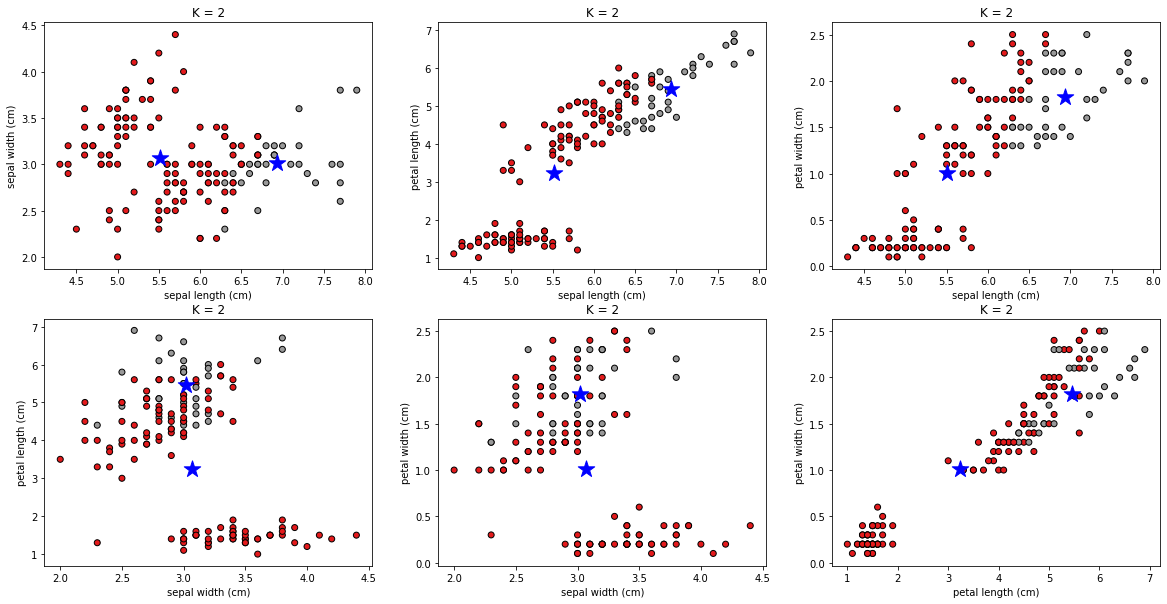

In [11]:
K = 2
nb_fig = 1
plt.figure(2, figsize=(20, 10))
plt.clf()
centers, clusters, cluster_size = K_means(iris.data, K)

for i in range(0, X.shape[1]):
    for j in range(i+1, X.shape[1]):
        plt.subplot(2,3, nb_fig)
        plt.scatter(X[:, i], X[:, j], c=clusters, cmap=plt.cm.Set1,
                edgecolor='k')
        data = iris.data[:, np.array([i, j])]
        
        plt.scatter(centers[0][i], centers[0][j],marker = '*', s = 300,
                c = 'b', label = 'center')
        plt.scatter(centers[1][i], centers[1][j], marker = '*', s = 300, c = 'b', label = 'center')
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        plt.title("K = 2")
        nb_fig = nb_fig + 1

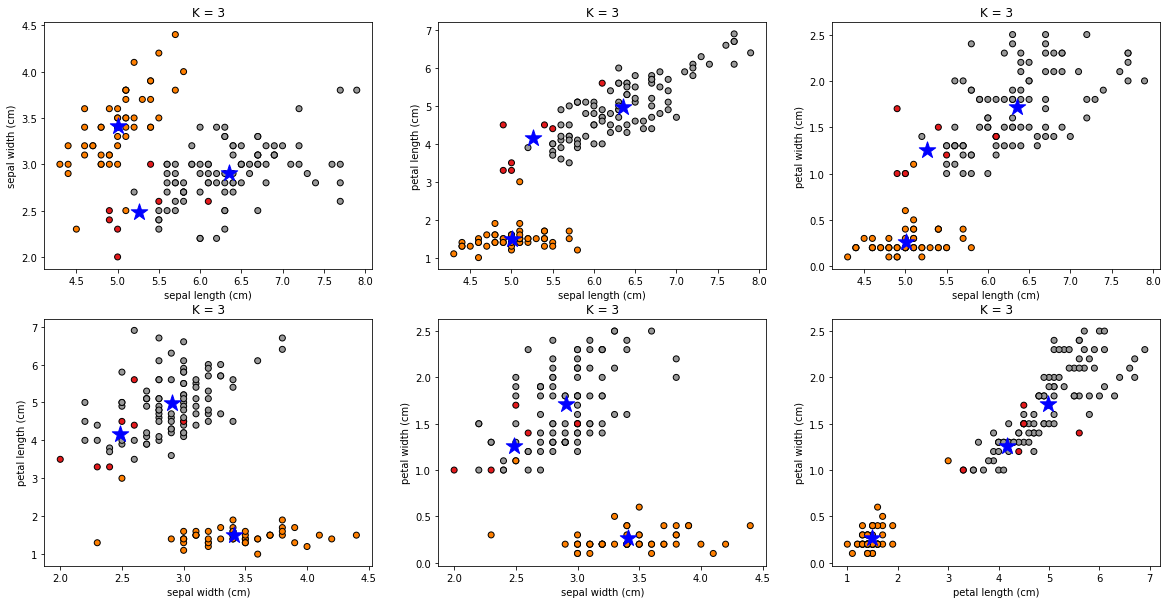

In [12]:
K = 3
nb_fig = 1
plt.figure(2, figsize=(20, 10))
plt.clf()
centers, clusters, cluster_size = K_means(iris.data, K)

for i in range(0, X.shape[1]):
    for j in range(i+1, X.shape[1]):
        plt.subplot(2,3, nb_fig)
        plt.scatter(X[:, i], X[:, j], c=clusters, cmap=plt.cm.Set1,
                edgecolor='k')
        data = iris.data[:, np.array([i, j])]
        
        plt.scatter(centers[0][i], centers[0][j],marker = '*', s = 300,
                c = 'b', label = 'center')
        plt.scatter(centers[1][i], centers[1][j], marker = '*', s = 300, c = 'b', label = 'center')
        plt.scatter(centers[2][i], centers[2][j], marker = '*', s = 300, c = 'b', label = 'center')
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        plt.title("K = 3")
        nb_fig = nb_fig + 1

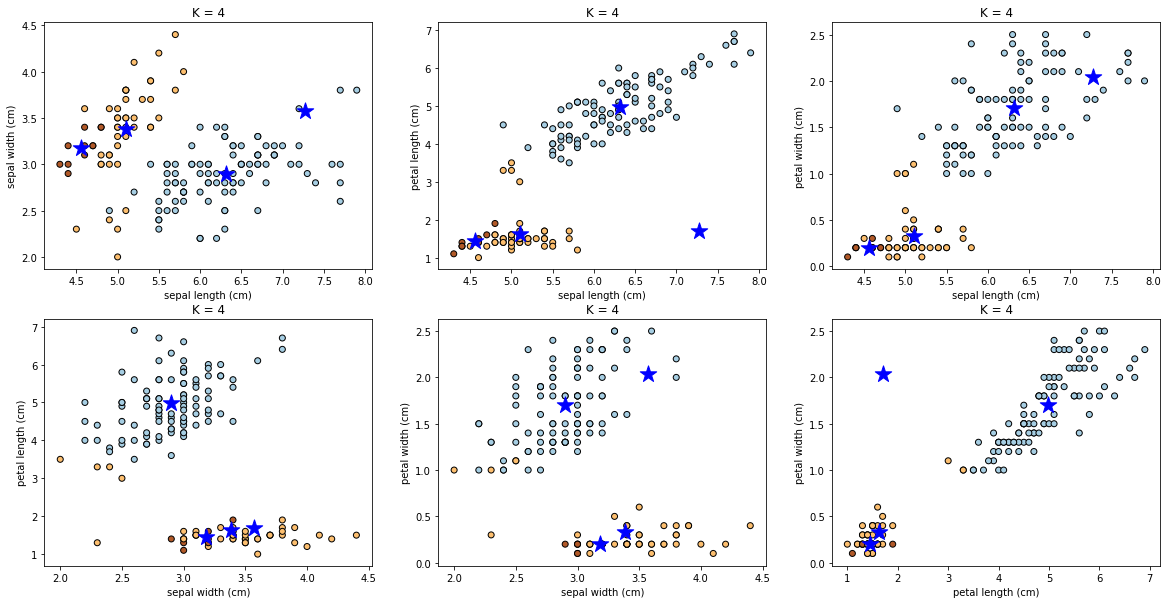

In [13]:
K = 4
nb_fig = 1
plt.figure(2, figsize=(20, 10))
plt.clf()
centers, clusters, cluster_size = K_means(iris.data, K)

for i in range(0, X.shape[1]):
    for j in range(i+1, X.shape[1]):
        plt.subplot(2,3, nb_fig)
        plt.scatter(X[:, i], X[:, j], c=clusters, cmap=plt.get_cmap('Paired'),
                edgecolor='k')
        data = iris.data[:, np.array([i, j])]
        
        plt.scatter(centers[0][i], centers[0][j],marker = '*', s = 300,
                c = 'b', label = 'center')
        plt.scatter(centers[1][i], centers[1][j], marker = '*', s = 300, c = 'b', label = 'center')
        plt.scatter(centers[2][i], centers[2][j], marker = '*', s = 300, c = 'b', label = 'center')
        plt.scatter(centers[3][i], centers[3][j], marker = '*', s = 300, c = 'b', label = 'center')
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        plt.title("K = 4")
        nb_fig = nb_fig + 1

## Code algorithme EM

In [14]:
def log_sum_exp(Z):
    return np.max(Z) + np.log(np.sum(np.exp(Z - np.max(Z))))

def loglikelihood(data, weights, means, covs):
    num_clusters = len(means)
    num_dim = len(data[0])   
    ll = 0
    for d in data:
        
        Z = np.zeros(num_clusters)
        for k in range(num_clusters):
            delta = np.array(d) - means[k]
            exponent_term = np.dot(delta.T, np.dot(np.linalg.inv(covs[k]), delta))
            Z[k] = Z[k] + np.log(weights[k])
            Z[k] = Z[k] - 1/2. * (num_dim * np.log(2*np.pi) + np.log(np.linalg.det(covs[k])) + exponent_term)
        ll = ll + log_sum_exp(Z)        
    return ll

In [15]:
def EM_diag(data, init_means, init_covariances, init_weights, maxiter=1000, thresh=1e-4):
    
    # Make copies of initial parameters, which we will update during each iteration
    means = init_means[:]
    covariances = init_covariances[:]
    weights = init_weights[:]
    
    # Infer dimensions of dataset and the number of clusters
    num_data = len(data)
    num_dim = len(data[0])
    num_clusters = len(means)
    
    # Initialize some useful variables
    resp = np.zeros((num_data, num_clusters))
    ll = loglikelihood(data, weights, means, covariances)
    ll_trace = [ll]
    
    for i in range(maxiter):
        if i % 5 == 0:
            print("Iteration %s" % i)
        for j in range(num_data):
            for k in range(num_clusters):
                resp[j, k] = weights[k]*multivariate_normal.pdf(data[j],means[k],covariances[k])
        row_sums = resp.sum(axis=1)[:, np.newaxis]
        resp = resp / row_sums 
        counts = np.sum(resp, axis=0)        
        for k in range(num_clusters):
            weights[k] = counts[k]/num_data
            weighted_sum = 0
            for j in range(num_data):
                weighted_sum = weighted_sum + (resp[j,k]*data[j])
            means[k] = weighted_sum/counts[k]
            weighted_sum = np.zeros((num_dim, num_dim))
            for j in range(num_data):
                weighted_sum = weighted_sum + (resp[j,k]*np.outer(data[j]-means[k],data[j]-means[k]))
            covariances[k] = weighted_sum/counts[k]
            covariances[k] = np.diag(np.diag(covariances[k]))
        ll_latest = loglikelihood(data, weights, means, covariances)
        ll_trace.append(ll_latest)
        if (ll_latest - ll) < thresh and ll_latest > -np.inf:
            break
        ll = ll_latest   
    if i % 5 != 0:
        print("Iteration %s" % i)    
    out = {'weights': weights, 'means': means, 'covs': covariances, 'loglik': ll_trace, 'resp': resp}
    return out

# Affichage de plusieurs exécutions de l'algortihme EM

## Avec des matrices diagonales

In [16]:
K = 4
np.random.seed(K+1)
chosen = np.random.choice(len(data), K, replace=False)
initial_means = [iris.data[x] for x in chosen]
initial_covs = [np.diag(np.diag(np.cov(iris.data, rowvar=0)))] * K
initial_weights = [1/K] * K

In [17]:
results = EM_diag(iris.data, initial_means, initial_covs, initial_weights) 

Iteration 0
Iteration 5
Iteration 10
Iteration 15
Iteration 20
Iteration 22


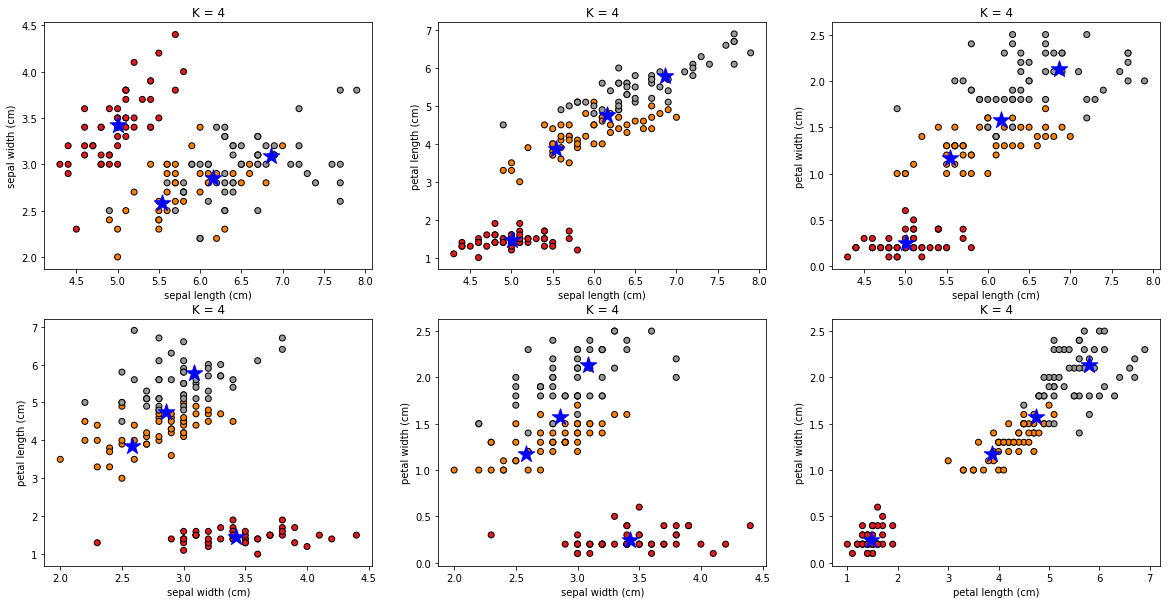

In [18]:
K = 4
nb_fig = 1
plt.figure(2, figsize=(20, 10))
plt.clf()
X = iris.data
mu = results['means']
for i in range(0, X.shape[1]):
    for j in range(i+1, X.shape[1]):
        plt.subplot(2,3, nb_fig)
        plt.scatter(X[:, i], X[:, j], c=iris.target, cmap=plt.cm.Set1,
                edgecolor='k')
        plt.scatter(mu[0][i], mu[0][j],marker = '*', s = 300,
                c = 'b', label = 'centroid')
        plt.scatter(mu[1][i], mu[1][j], marker = '*', s = 300, c='b', label = 'centroid')
        plt.scatter(mu[2][i], mu[2][j], marker = '*', s = 300, c = 'b', label = 'centroid')
        plt.scatter(mu[3][i], mu[3][j], marker = '*', s = 300, c = 'b', label = 'centroid')
        
            
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        plt.title("K = 4")
        nb_fig = nb_fig + 1

In [19]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                     mux=0.0, muy=0.0, sigmaxy=0.0):
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom


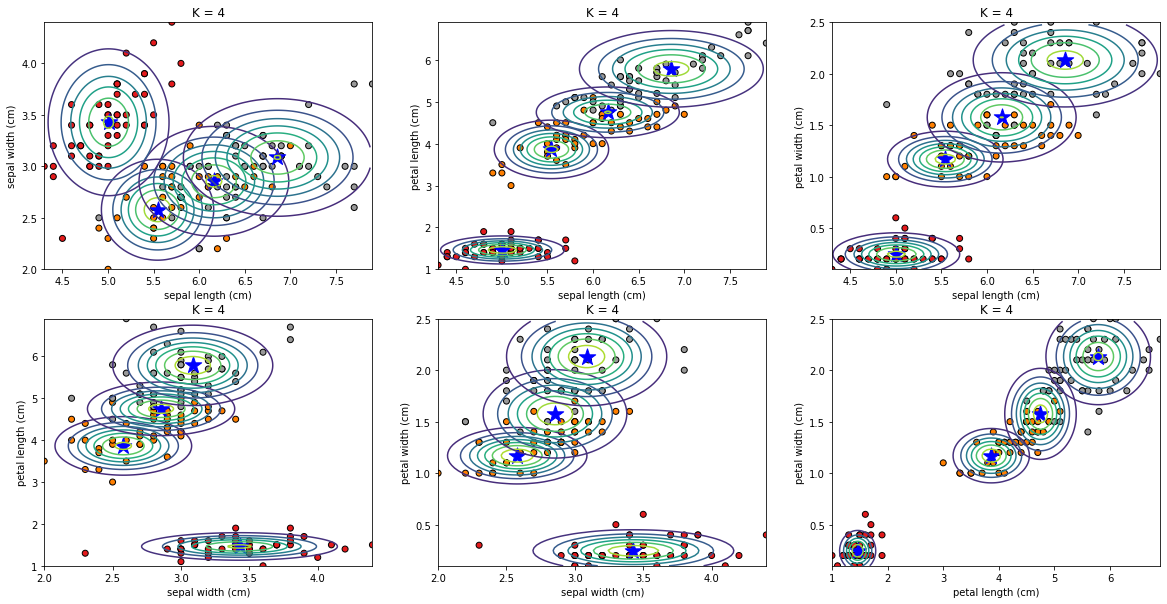

In [20]:
K = 4
nb_fig = 1
plt.figure(2, figsize=(20, 10))
plt.clf()
X = iris.data
mu = results['means']
sigma = results['covs']
for i in range(0, X.shape[1]):
    for j in range(i+1, X.shape[1]):
        plt.subplot(2,3, nb_fig)
        plt.scatter(X[:, i], X[:, j], c=iris.target, cmap=plt.cm.Set1,
                edgecolor='k')
        plt.scatter(mu[0][i], mu[0][j],marker = '*', s = 300,
                c = 'b', label = 'centroid')
        plt.scatter(mu[1][i], mu[1][j], marker = '*', s = 300, c='b', label = 'centroid')
        plt.scatter(mu[2][i], mu[2][j], marker = '*', s = 300, c = 'b', label = 'centroid')
        plt.scatter(mu[3][i], mu[3][j], marker = '*', s = 300, c = 'b', label = 'centroid')
        x_min, x_max = X[:, i].min() , X[:, i].max() 
        y_min, y_max = X[:, j].min() , X[:, j].max() 
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        x = np.arange(x_min, x_max, 0.025)
        y = np.arange(y_min, y_max, 0.025)
        X_2, Y_2 = np.meshgrid(x, y)
        col = ['green', 'red', 'indigo', 'b']
        for k in range(K):
            mean = mu[k]
            cov = sigma[k]
            sigmax = np.sqrt(cov[i][i])
            sigmay = np.sqrt(cov[j][j])
            sigmaxy = cov[i][j]/(sigmax*sigmay)
            Z = bivariate_normal(X_2, Y_2, sigmax, sigmay, mean[i], mean[j], sigmaxy)
            plt.contour(X_2, Y_2, Z)
        
        plt.title('essai')
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        plt.title("K = 4")
        nb_fig = nb_fig + 1

In [21]:
K = 3
np.random.seed(K+1)
chosen = np.random.choice(len(data), K, replace=False)
initial_means = [iris.data[x] for x in chosen]
initial_covs = [np.diag(np.diag(np.cov(iris.data, rowvar=0)))] * K
initial_weights = [1/K] * K

In [22]:
results = EM_diag(iris.data, initial_means, initial_covs, initial_weights) 

Iteration 0
Iteration 5
Iteration 10
Iteration 12


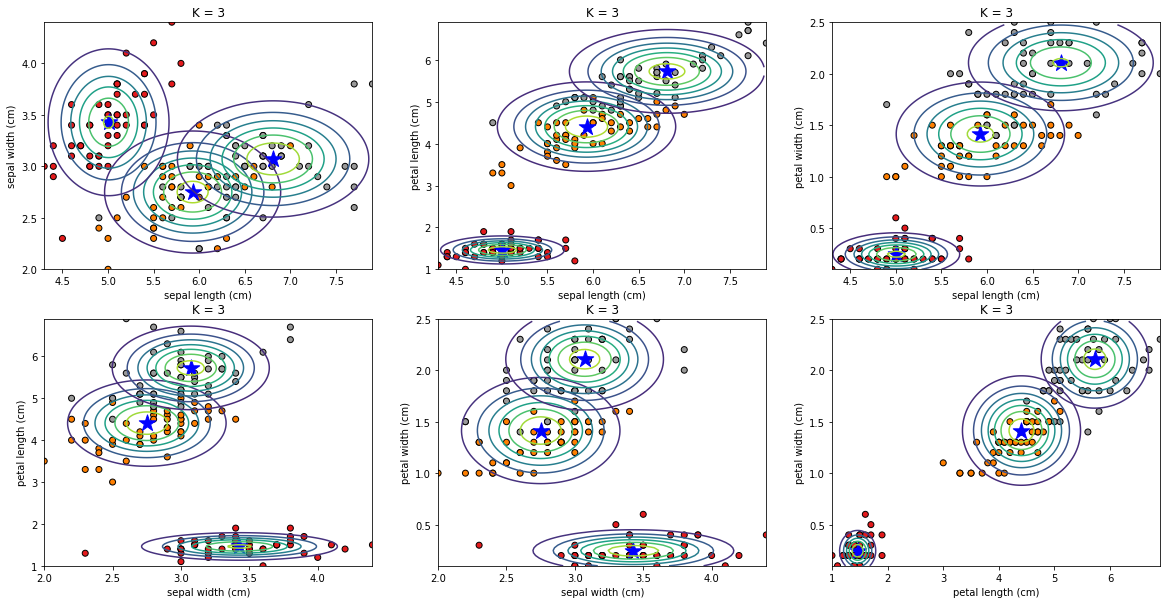

In [23]:
K = 3
nb_fig = 1
plt.figure(2, figsize=(20, 10))
plt.clf()
X = iris.data
mu = results['means']
sigma = results['covs']
for i in range(0, X.shape[1]):
    for j in range(i+1, X.shape[1]):
        plt.subplot(2,3, nb_fig)
        plt.scatter(X[:, i], X[:, j], c=iris.target, cmap=plt.cm.Set1,
                edgecolor='k')
        plt.scatter(mu[0][i], mu[0][j],marker = '*', s = 300,
                c = 'b', label = 'centroid')
        plt.scatter(mu[1][i], mu[1][j], marker = '*', s = 300, c='b', label = 'centroid')
        plt.scatter(mu[2][i], mu[2][j], marker = '*', s = 300, c = 'b', label = 'centroid')
        x_min, x_max = X[:, i].min() , X[:, i].max() 
        y_min, y_max = X[:, j].min() , X[:, j].max() 
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        x = np.arange(x_min, x_max, 0.025)
        y = np.arange(y_min, y_max, 0.025)
        X_2, Y_2 = np.meshgrid(x, y)
        col = ['green', 'red', 'indigo']
        for k in range(K):
            mean = mu[k]
            cov = sigma[k]
            sigmax = np.sqrt(cov[i][i])
            sigmay = np.sqrt(cov[j][j])
            sigmaxy = cov[i][j]/(sigmax*sigmay)
            Z = bivariate_normal(X_2, Y_2, sigmax, sigmay, mean[i], mean[j], sigmaxy)
            plt.contour(X_2, Y_2, Z)
        
        plt.title('essai')
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        plt.title("K = 3")
        nb_fig = nb_fig + 1

In [24]:
K = 2
np.random.seed(K+1)
chosen = np.random.choice(len(data), K, replace=False)
initial_means = [iris.data[x] for x in chosen]
initial_covs = [np.diag(np.diag(np.cov(iris.data, rowvar=0)))] * K
initial_weights = [1/K] * K

In [25]:
results = EM_diag(iris.data, initial_means, initial_covs, initial_weights) 

Iteration 0
Iteration 5
Iteration 7


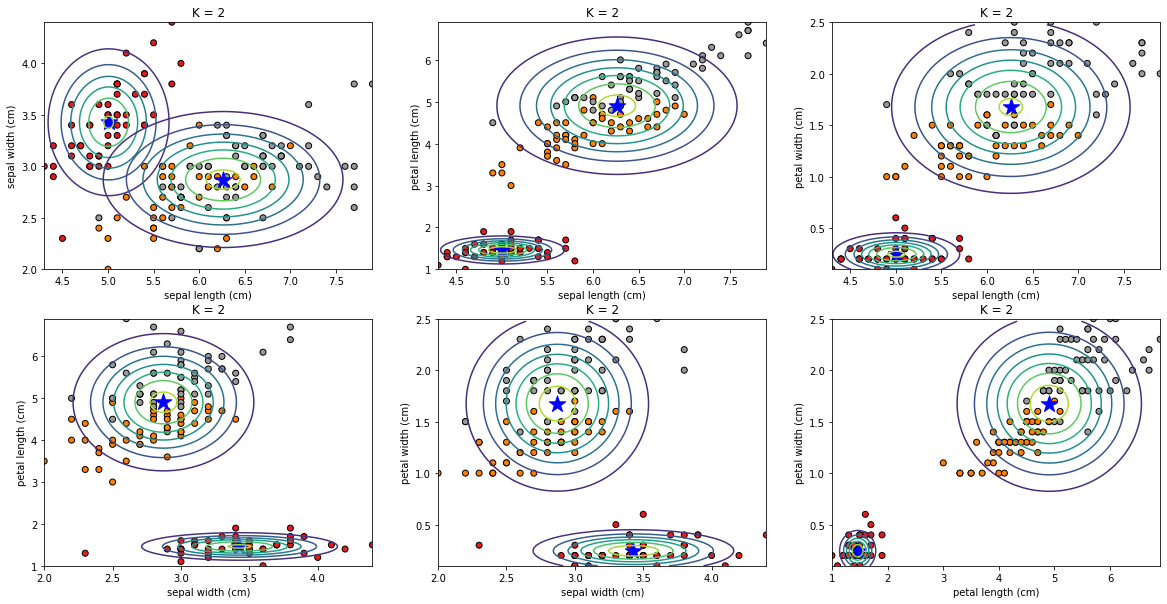

In [26]:
K = 2
nb_fig = 1
plt.figure(2, figsize=(20, 10))
plt.clf()
X = iris.data
mu = results['means']
sigma = results['covs']
for i in range(0, X.shape[1]):
    for j in range(i+1, X.shape[1]):
        plt.subplot(2,3, nb_fig)
        plt.scatter(X[:, i], X[:, j], c=iris.target, cmap=plt.cm.Set1,
                edgecolor='k')
        plt.scatter(mu[0][i], mu[0][j],marker = '*', s = 300,
                c = 'b', label = 'centroid')
        plt.scatter(mu[1][i], mu[1][j], marker = '*', s = 300, c='b', label = 'centroid')
        x_min, x_max = X[:, i].min() , X[:, i].max() 
        y_min, y_max = X[:, j].min() , X[:, j].max() 
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        x = np.arange(x_min, x_max, 0.025)
        y = np.arange(y_min, y_max, 0.025)
        X_2, Y_2 = np.meshgrid(x, y)
        col = ['green', 'red', 'indigo']
        for k in range(K):
            mean = mu[k]
            cov = sigma[k]
            sigmax = np.sqrt(cov[i][i])
            sigmay = np.sqrt(cov[j][j])
            sigmaxy = cov[i][j]/(sigmax*sigmay)
            Z = bivariate_normal(X_2, Y_2, sigmax, sigmay, mean[i], mean[j], sigmaxy)
            plt.contour(X_2, Y_2, Z)
        
        plt.title('essai')
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        plt.title("K = 2")
        nb_fig = nb_fig + 1

## Avec des matrices complètes


In [84]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                     mux=0.0, muy=0.0, sigmaxy=0.0):
    Xmu = X-mux
    Ymu = Y-muy

    rho = (sigmaxy/(sigmax*sigmay)).astype('float64')
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt((1-rho**2).astype('float64'))
    return np.exp(-z/(2*(1-rho**2))) / denom
K = 2
data = iris.data
np.random.seed(K+1)
chosen = np.random.choice(len(data), K, replace=False)
initial_means = [iris.data[x] for x in chosen]
initial_covs = [np.cov(iris.data, rowvar=0)] * K
initial_weights = [1/K] * K

In [85]:
def EM(data, init_means, init_covariances, init_weights, maxiter=1000, thresh=1e-4):
    
    # Make copies of initial parameters, which we will update during each iteration
    means = init_means[:]
    covariances = init_covariances[:]
    weights = init_weights[:]
    
    # Infer dimensions of dataset and the number of clusters
    num_data = len(data)
    num_dim = len(data[0])
    num_clusters = len(means)
    
    # Initialize some useful variables
    resp = np.zeros((num_data, num_clusters))
    ll = loglikelihood(data, weights, means, covariances)
    ll_trace = [ll]
    
    for i in range(maxiter):
        if i % 5 == 0:
            print("Iteration %s" % i)
        for j in range(num_data):
            for k in range(num_clusters):
                resp[j, k] = weights[k]*multivariate_normal.pdf(data[j],means[k],covariances[k])
        row_sums = resp.sum(axis=1)[:, np.newaxis]
        resp = resp / row_sums 
        counts = np.sum(resp, axis=0)        
        for k in range(num_clusters):
            weights[k] = counts[k]/num_data
            weighted_sum = 0
            for j in range(num_data):
                weighted_sum = weighted_sum + (resp[j,k]*data[j])
            means[k] = weighted_sum/counts[k]
            weighted_sum = np.zeros((num_dim, num_dim))
            for j in range(num_data):
                weighted_sum = weighted_sum + (resp[j,k]*np.outer(data[j]-means[k],data[j]-means[k]))
            covariances[k] = weighted_sum/counts[k]
        ll_latest = loglikelihood(data, weights, means, covariances)
        ll_trace.append(ll_latest)
        if (ll_latest - ll) < thresh and ll_latest > -np.inf:
            break
        ll = ll_latest   
    if i % 5 != 0:
        print("Iteration %s" % i)    
    out = {'weights': weights, 'means': means, 'covs': covariances, 'loglik': ll_trace, 'resp': resp}
    return out

In [86]:
results = EM(iris.data, initial_means, initial_covs, initial_weights)

Iteration 0
Iteration 5
Iteration 10
Iteration 15
Iteration 20
Iteration 25
Iteration 30
Iteration 35
Iteration 40


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: No contour levels were found within the data range.


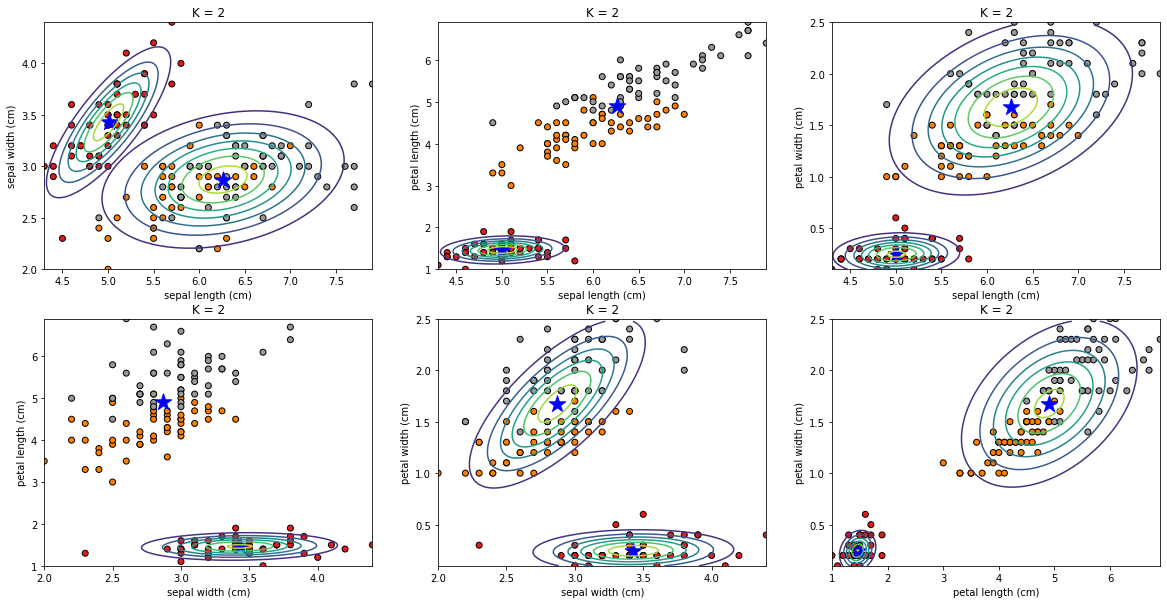

In [87]:
K = 2
nb_fig = 1
plt.figure(2, figsize=(20, 10))
plt.clf()
X = iris.data
mu = results['means']
sigma = results['covs']
for i in range(0, X.shape[1]):
    for j in range(i+1, X.shape[1]):
        plt.subplot(2,3, nb_fig)
        plt.scatter(X[:, i], X[:, j], c=iris.target, cmap=plt.cm.Set1,
                edgecolor='k')
        plt.scatter(mu[0][i], mu[0][j],marker = '*', s = 300,
                c = 'b', label = 'centroid')
        plt.scatter(mu[1][i], mu[1][j], marker = '*', s = 300, c='b', label = 'centroid')
        #plt.scatter(mu[2][i], mu[2][j], marker = '*', s = 300, c = 'b', label = 'centroid')
        #plt.scatter(mu[3][i], mu[3][j], marker = '*', s = 300, c = 'b', label = 'centroid')
        x_min, x_max = X[:, i].min() , X[:, i].max() 
        y_min, y_max = X[:, j].min() , X[:, j].max() 
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        x = np.arange(x_min, x_max, 0.025)
        y = np.arange(y_min, y_max, 0.025)
        X_2, Y_2 = np.meshgrid(x, y)
        col = ['green', 'red', 'indigo', 'b']
        
        for k in range(K):
            mean = mu[k]
            cov = sigma[k]
            sigmax = np.sqrt(cov[i][i].astype('float64'))
            sigmay = np.sqrt(cov[j][j].astype('float64'))
            sigmaxy = (cov[i][j].astype('float64')/sigmax*sigmay).astype('float64')
            #print(sigmaxy)
            
            Z = bivariate_normal(X_2, Y_2, sigmax, sigmay, mean[i], mean[j], sigmaxy).astype('float64')
            
            plt.contour(X_2, Y_2, Z)
        
        plt.title('essai')
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        plt.title("K = 2")
        nb_fig = nb_fig + 1

In [88]:
K = 3
data = iris.data
np.random.seed(K+1)
chosen = np.random.choice(len(data), K, replace=False)
initial_means = [iris.data[x] for x in chosen]
initial_covs = [np.cov(iris.data, rowvar=0)] * K
initial_weights = [1/K] * K

In [89]:
def EM(data, init_means, init_covariances, init_weights, maxiter=1000, thresh=1e-4):
    
    # Make copies of initial parameters, which we will update during each iteration
    means = init_means[:]
    covariances = init_covariances[:]
    weights = init_weights[:]
    
    # Infer dimensions of dataset and the number of clusters
    num_data = len(data)
    num_dim = len(data[0])
    num_clusters = len(means)
    
    # Initialize some useful variables
    resp = np.zeros((num_data, num_clusters))
    ll = loglikelihood(data, weights, means, covariances)
    ll_trace = [ll]
    
    for i in range(maxiter):
        if i % 5 == 0:
            print("Iteration %s" % i)
        for j in range(num_data):
            for k in range(num_clusters):
                resp[j, k] = weights[k]*multivariate_normal.pdf(data[j],means[k],covariances[k])
        row_sums = resp.sum(axis=1)[:, np.newaxis]
        resp = resp / row_sums 
        counts = np.sum(resp, axis=0)        
        for k in range(num_clusters):
            weights[k] = counts[k]/num_data
            weighted_sum = 0
            for j in range(num_data):
                weighted_sum = weighted_sum + (resp[j,k]*data[j])
            means[k] = weighted_sum/counts[k]
            weighted_sum = np.zeros((num_dim, num_dim))
            for j in range(num_data):
                weighted_sum = weighted_sum + (resp[j,k]*np.outer(data[j]-means[k],data[j]-means[k]))
            covariances[k] = weighted_sum/counts[k]
        ll_latest = loglikelihood(data, weights, means, covariances)
        ll_trace.append(ll_latest)
        if (ll_latest - ll) < thresh and ll_latest > -np.inf:
            break
        ll = ll_latest   
    if i % 5 != 0:
        print("Iteration %s" % i)    
    out = {'weights': weights, 'means': means, 'covs': covariances, 'loglik': ll_trace, 'resp': resp}
    return out

In [90]:
results = EM(iris.data, initial_means, initial_covs, initial_weights)

Iteration 0
Iteration 5
Iteration 10
Iteration 15
Iteration 20
Iteration 25
Iteration 30
Iteration 35
Iteration 40
Iteration 45
Iteration 50
Iteration 55
Iteration 60
Iteration 65
Iteration 70
Iteration 75
Iteration 80
Iteration 85
Iteration 90
Iteration 95
Iteration 100
Iteration 105
Iteration 110
Iteration 115
Iteration 120
Iteration 125
Iteration 130
Iteration 135
Iteration 140
Iteration 145
Iteration 150
Iteration 155
Iteration 160
Iteration 165
Iteration 170
Iteration 175
Iteration 180
Iteration 185
Iteration 190
Iteration 193


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: No contour levels were found within the data range.


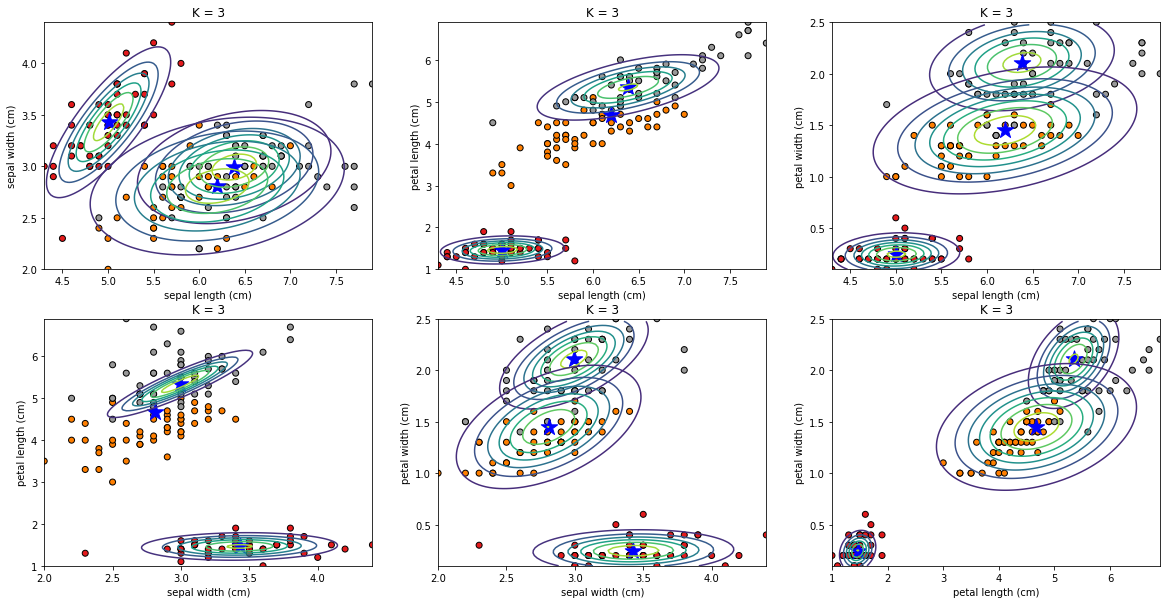

In [91]:
K = 3
nb_fig = 1
plt.figure(2, figsize=(20, 10))
plt.clf()
X = iris.data
mu = results['means']
sigma = results['covs']
for i in range(0, X.shape[1]):
    for j in range(i+1, X.shape[1]):
        plt.subplot(2,3, nb_fig)
        plt.scatter(X[:, i], X[:, j], c=iris.target, cmap=plt.cm.Set1,
                edgecolor='k')
        plt.scatter(mu[0][i], mu[0][j],marker = '*', s = 300,
                c = 'b', label = 'centroid')
        plt.scatter(mu[1][i], mu[1][j], marker = '*', s = 300, c='b', label = 'centroid')
        plt.scatter(mu[2][i], mu[2][j], marker = '*', s = 300, c = 'b', label = 'centroid')
        #plt.scatter(mu[3][i], mu[3][j], marker = '*', s = 300, c = 'b', label = 'centroid')
        x_min, x_max = X[:, i].min() , X[:, i].max() 
        y_min, y_max = X[:, j].min() , X[:, j].max() 
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        x = np.arange(x_min, x_max, 0.025)
        y = np.arange(y_min, y_max, 0.025)
        X_2, Y_2 = np.meshgrid(x, y)
        col = ['green', 'red', 'indigo', 'b']
        
        for k in range(K):
            mean = mu[k]
            cov = sigma[k]
            sigmax = np.sqrt(cov[i][i].astype('float64'))
            sigmay = np.sqrt(cov[j][j].astype('float64'))
            sigmaxy = (cov[i][j].astype('float64')/sigmax*sigmay).astype('float64')
            #print(sigmaxy)
            
            Z = bivariate_normal(X_2, Y_2, sigmax, sigmay, mean[i], mean[j], sigmaxy).astype('float64')
            
            plt.contour(X_2, Y_2, Z)
        
        plt.title('essai')
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        plt.title("K = 3")
        nb_fig = nb_fig + 1

In [92]:
K = 2
data = iris.data
np.random.seed(K+1)
chosen = np.random.choice(len(data), K, replace=False)
initial_means = [iris.data[x] for x in chosen]
initial_covs = [np.cov(iris.data, rowvar=0)] * K
initial_weights = [1/K] * K

In [93]:
results = EM(iris.data, initial_means, initial_covs, initial_weights)

Iteration 0
Iteration 5
Iteration 10
Iteration 15
Iteration 20
Iteration 25
Iteration 30
Iteration 35
Iteration 40


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: No contour levels were found within the data range.


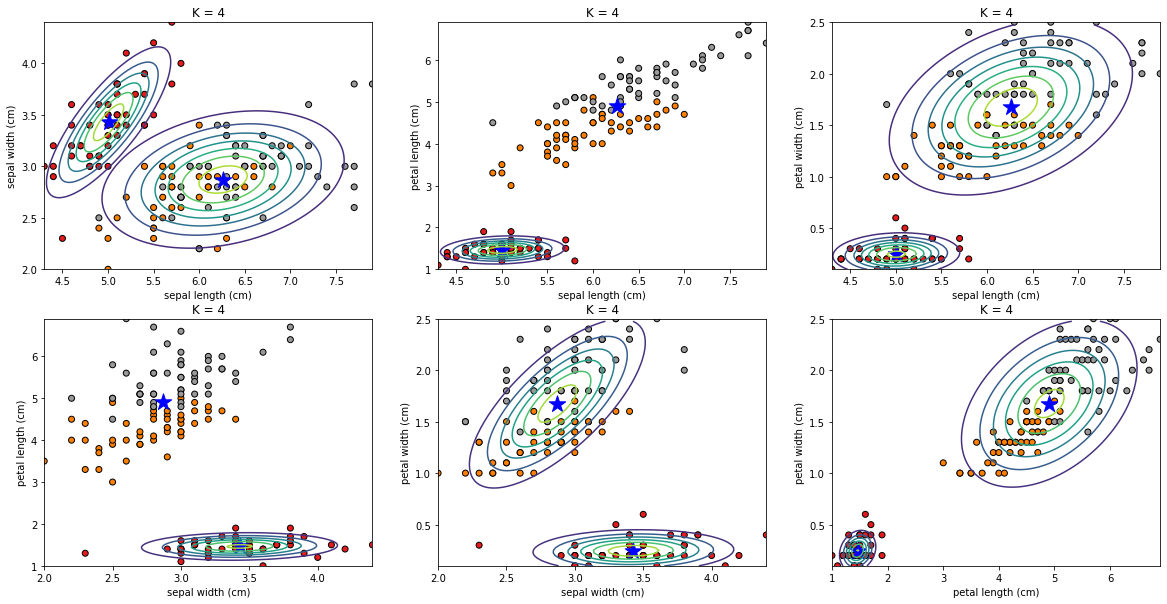

In [95]:
K = 2
nb_fig = 1
plt.figure(2, figsize=(20, 10))
plt.clf()
X = iris.data
mu = results['means']
sigma = results['covs']
for i in range(0, X.shape[1]):
    for j in range(i+1, X.shape[1]):
        plt.subplot(2,3, nb_fig)
        plt.scatter(X[:, i], X[:, j], c=iris.target, cmap=plt.cm.Set1,
                edgecolor='k')
        plt.scatter(mu[0][i], mu[0][j],marker = '*', s = 300,
                c = 'b', label = 'centroid')
        plt.scatter(mu[1][i], mu[1][j], marker = '*', s = 300, c='b', label = 'centroid')
        #plt.scatter(mu[2][i], mu[2][j], marker = '*', s = 300, c = 'b', label = 'centroid')
        #plt.scatter(mu[3][i], mu[3][j], marker = '*', s = 300, c = 'b', label = 'centroid')
        x_min, x_max = X[:, i].min() , X[:, i].max() 
        y_min, y_max = X[:, j].min() , X[:, j].max() 
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        x = np.arange(x_min, x_max, 0.025)
        y = np.arange(y_min, y_max, 0.025)
        X_2, Y_2 = np.meshgrid(x, y)
        col = ['green', 'red', 'indigo', 'b']
        
        for k in range(K):
            mean = mu[k]
            cov = sigma[k]
            sigmax = np.sqrt(cov[i][i].astype('float64'))
            sigmay = np.sqrt(cov[j][j].astype('float64'))
            sigmaxy = (cov[i][j].astype('float64')/sigmax*sigmay).astype('float64')
            #print(sigmaxy)
            
            Z = bivariate_normal(X_2, Y_2, sigmax, sigmay, mean[i], mean[j], sigmaxy).astype('float64')
            
            plt.contour(X_2, Y_2, Z)
        
        plt.title('essai')
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        plt.title("K = 4")
        nb_fig = nb_fig + 1

# Mise en évidence de la différence entre k means et EM

Text(0.5, 1.0, 'Données artificielles')

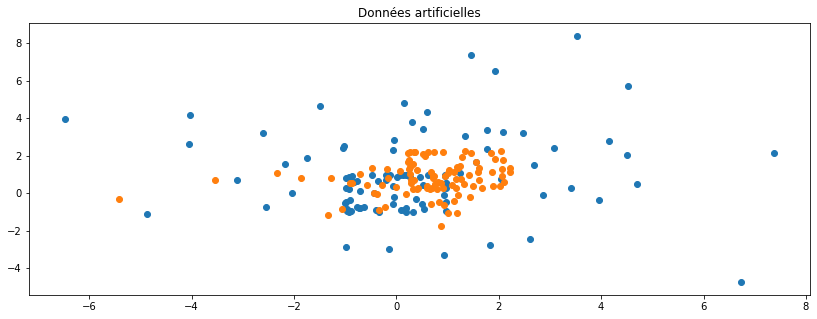

In [36]:
np.random.seed(1)
distr_1 = np.sin(2 * np.random.randn(100) + np.random.randn())
distr_2 = (3 * np.random.randn(100)) + np.random.randn()

distr_11 = np.log(np.absolute(2 * np.random.randn(100) + np.random.randn()))
distr_21 = np.sin(3 * np.random.randn(100)) + np.random.randn()


X1_train = np.concatenate((distr_1, distr_2))
X1_train = X1_train.reshape(100, 2)

X11_train = np.concatenate((distr_11, distr_21))
X11_train = X11_train.reshape(100, 2)


X1_plot = X1_train[:, 0]
Y1_plot = X1_train[:, 1]

X11_plot = X11_train[:, 0]
Y11_plot = X11_train[:, 1]

plt.figure(2, figsize=(14, 5))
plt.scatter(X1_plot, Y1_plot)
plt.scatter(X11_plot, Y11_plot)
plt.title("Données artificielles")

In [37]:
merged_x = np.concatenate((X1_train[:,0],X11_train[:,0])).reshape(200,1)
merged_y = np.concatenate((X1_train[:,1],X11_train[:,1])).reshape(200,1)
merged = np.concatenate((merged_x, merged_y), axis=1)

In [38]:
from nltk.cluster import KMeansClusterer, euclidean_distance, cosine_distance
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

Text(0.5, 1.0, 'Clusters avec EM')

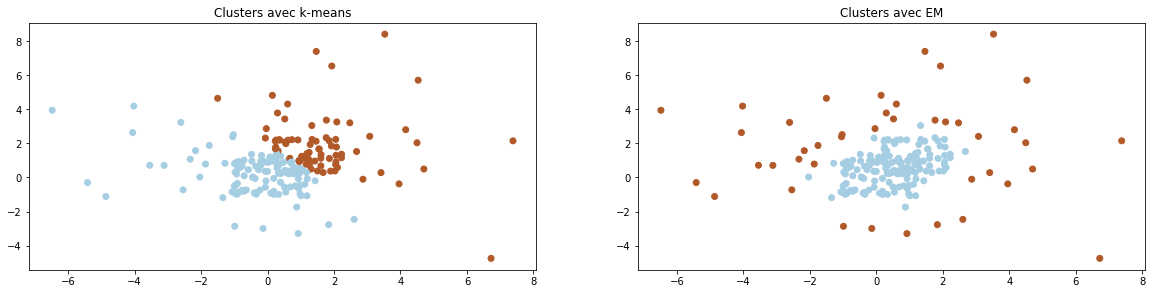

In [39]:
km = KMeans(2, random_state=0)
labels_1 = km.fit(merged).predict(merged)
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(merged)
labels_2 = gmm.predict(merged)
plt.figure(2, figsize=(20, 10))
plt.clf()
plt.subplot(2,2,1)
plt.scatter(merged[:,0], merged[:,1], c=labels_1, cmap='Paired')
plt.title("Clusters avec k-means")
plt.subplot(2,2,2)
plt.scatter(merged[:,0], merged[:,1], c=labels_2, cmap='Paired')
plt.title("Clusters avec EM")

# Graphs, algorithms and Ising


In [0]:
def log_sum(a, b):
    return max(a,b)+np.log(1+np.exp(min(a,b)-max(a,b)))

def log_sum_array(l):
    log_s = 0
    for i in range(0,len(l)):
        log_s = log_sum(log_s,l[i])
    return log_s

In [0]:
import itertools

lst = list(map(list, itertools.product([0, 1], repeat=3)))
array = np.asarray(lst)

In [5]:
print(lst)

print(array)
print(array.shape)
print(array[0])

[[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
(8, 3)
[0 0 0]


On implémente le "sum-product algorithm" pour une chaîne non dirigée de $h$ noeuds dont les éléments à chaque noeud sont des vecteurs $x_i$, pour $i\in\{1,...,h\}$, de taille $w$ dont chaque élément $x_{i,j}\in\{0,1\}$, pour $j\in\{1,...,w\}$. On représente donc l'input de la fonction qui sont les fonctions de potentiel aux noeuds $\psi_i$ et aux bords $\psi_{i,i+1}$ de la façon suivante :

1) Pour $\psi_i$ : une matrice potential_node de taille $(2^w,h)$ dont chaque colonne $\text{potential_node}[:,i]$ représente $\psi_i$. Chaque élément $\text{potential_node}[j,i]=\psi_i(x)$ pour $x\in\{0,1\}^w$, donc la colonne $\text{potential_node}[:,i]$ contient toutes les valeurs de la fonction $\psi_i$ appliqué à chaque élément de l'univers $\{0,1\}^w$, donc $2^w$ valeurs différentes.
    
2) Pour $\psi_{i,i+1}$ : de même que pour $\psi_i$, un bloc de $h-1$ matrices $\text{potential_edge}[:,:,k]$ de taille $(2^w,2^w)$ (un tenseur $\text{potential_edge}$ de taille $(2^w,2^w,h-1)$), dont chaque matrice $\text{potential_edge}[:,:,k]$ représente $\psi_{k,k+1}$. Chaque élément $\text{potential_edge}[i,j,k]=\psi_{k,k+1}(x,y)$ pour $x\in\{0,1\}^w$ et $y\in\{0,1\}^w$, donc la matrice $\text{potential_edge}[:,:,k]$ contient toutes les valeurs de la fonction $\psi_{k,k+1}$ appliqué à chaque élément de l'univers $\{0,1\}^w\times\{0,1\}^w$, donc $2^w\times2^w$ valeurs différentes.

L'output de cette fonction est l'ensemble des forward $\mu_{i\to i+1}$ et backward $\mu_{i\to i-1}$ messages, représentée de même :

1) Pour les $\mu_{i\to i+1}$ : une matrice forward_msg de taille $(2^w,h-1)$ dont chaque colonne $\text{forward_msg}[:,i]$ représente $\mu_{i\to i+1}$. Chaque élément $\text{forward_msg}[j,i]=\mu_{i\to i+1}(x)$ pour $x\in\{0,1\}^w$, donc la colonne $\text{forward_msg}[:,i]$ contient toutes les valeurs de la fonction $\mu_{i\to i+1}$ appliqué à chaque élément de l'univers $\{0,1\}^w$, donc $2^w$ valeurs différentes.
    
2) Pour les $\mu_{i\to i-1}$ : une matrice backward_msg de taille $(2^w,h-1)$ dont chaque colonne $\text{backward_msg}[:,i]$ représente $\mu_{i\to i-1}$. Chaque élément $\text{backward_msg}[j,i]=\mu_{i\to i-1}(x)$ pour $x\in\{0,1\}^w$, donc la colonne $\text{backward_msg}[:,i]$ contient toutes les valeurs de la fonction $\mu_{i\to i-1}$ appliqué à chaque élément de l'univers $\{0,1\}^w$, donc $2^w$ valeurs différentes.

In [0]:
def spa_chain(potential_node, potential_edge):
    
    h = potential_node.shape[1]
    cardinal = potential_node.shape[0]
    
    forward_msg = np.zeros((cardinal,h-1))
    backward_msg = np.zeros((cardinal,h-1))
    
    for i in range(cardinal):
        forward_msg[i,0] = log_sum_array(potential_node[:,0] + potential_edge[:,i,0])
        backward_msg[i,h-2] = log_sum_array(potential_node[:,h-1] + potential_edge[i,:,h-2])
    
    for j in range(1,h-1):
        for i in range(cardinal):
            forward_msg[i,j] = log_sum_array(potential_node[:,j] + potential_edge[:,i,j] + forward_msg[:,j-1])
            backward_msg[i,h-2-j] = log_sum_array(potential_node[:,h-1-j] + potential_edge[i,:,h-2-j] + backward_msg[:,h-1-j])
            
    return forward_msg, backward_msg

In [0]:
def psi_i(x, beta):
  return beta*sum(x[j]==x[j+1] for j in range(len(x)-1))

def psi_ii(x1, x2, beta):
    return beta*sum(x1[j]==x2[j] for j in range(len(x1)))

def potentialNode(h, w, beta):
    potential_node = np.zeros((2**w,1))
    all_values = np.asarray(list(map(list, itertools.product([0, 1], repeat=w))))
    for i in range(2**w):
      potential_node[i,0] = psi_i(all_values[i], beta)
    column = potential_node
    for j in range(h-1):
      potential_node = np.hstack((potential_node,column))
    return potential_node

def potentialEdge(h, w, beta):
    potential_edge = np.zeros((2**w,2**w,1))
    all_values = np.asarray(list(map(list, itertools.product([0, 1], repeat=w))))
    for i in range(2**w):
      for j in range(2**w):
        potential_edge[i,j,0] = psi_ii(all_values[i], all_values[j], beta)
    matrix = potential_edge
    for k in range(h-2):
      potential_edge = np.dstack((potential_edge,matrix))
    return potential_edge

In [8]:
w = 10
h = 100
beta = 1

potential_node = potentialNode(h,w,beta)
print(potential_node.shape)
potential_edge = potentialEdge(h,w,beta)
print(potential_edge.shape)


(1024, 100)
(1024, 1024, 99)


In [0]:
forward_msg, backward_msg = spa_chain(potential_node, potential_edge)

In [0]:
Z = log_sum_array(potential_node[:,0] + backward_msg[:,0])

In [11]:
print(Z)

1934.5424332514656


In [0]:
def partition(beta):
  potential_node = potentialNode(h,w,beta)
  potential_edge = potentialEdge(h,w,beta)
  forward_msg, backward_msg = spa_chain(potential_node, potential_edge)
  Z = log_sum_array(potential_node[:,0] + backward_msg[:,0])
  return Z


In [54]:
beta_array = np.linspace(0,2.0,21)
log_Z = np.zeros(21)

for i in range(21):
  print("Iteration %s" % i)
  log_Z[i] = partition(beta_array[i])


Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20


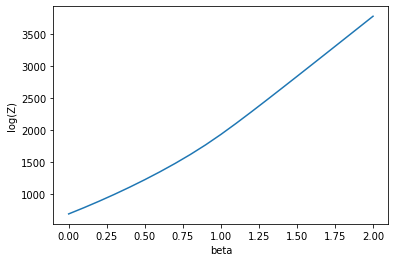

In [63]:
plt.plot(beta_array, log_Z)
plt.xlabel('beta')
plt.ylabel('log(Z)')
plt.show()

In [59]:
beta_array2 = np.linspace(-5,5,11)
log_Z2 = np.zeros(11)

for i in range(11):
  print("Iteration %s" % i)
  log_Z2[i] = partition(beta_array2[i])


Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10


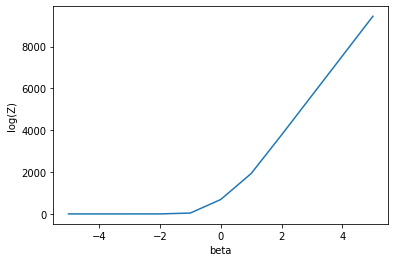

In [62]:
plt.plot(beta_array2, log_Z2)
plt.xlabel('beta')
plt.ylabel('log(Z)')
plt.show()